In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plots import *
import scipy as sp
import os 


In [33]:
summary = pd.read_parquet(os.path.join('team_summary.parquet'))
total = pd.read_csv(os.path.join('nba', 'Team Totals.csv'))
sns.set_theme(style='darkgrid')
plt.rcParams['figure.dpi']=200


# L'NBA, analisi del gioco nel corso degli anni

## Perchè ho scelto questo argomento?
* passione per il basket
* curiosità sull'evoluzione del gioco
* recente conclusione della stagione

## Domande che hanno guidato l'analisi 

DOMANDE:
1. come sono variate le statistiche cestistiche nel corso degli anni? 

2. il tiro da 3 punti ha cambiato il gioco?

3. la fisicità nelle partite è scesa per dare spazio allo spettacolo?

4. esiste una statistica che permette di anticipare chi vincera?

# NBA stats dataset

* dove è stato trovato : [kaggle](https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats), dove i dati sono aggiornati all'ultima stagione 2023/2024
  
* disponibile anche un'API ufficiale, qui un riferimento ad un [tutorial](https://github.com/swar/nba_api ) 

* contiene statistiche base e avanzate di squadre e giocatori nella regular season, i playoffs non sono contenuti nel dataset

# Com'è cambiato il gioco nel corso dei più di 70 anni di storia?

## come sono cambiate le statistiche principali ?

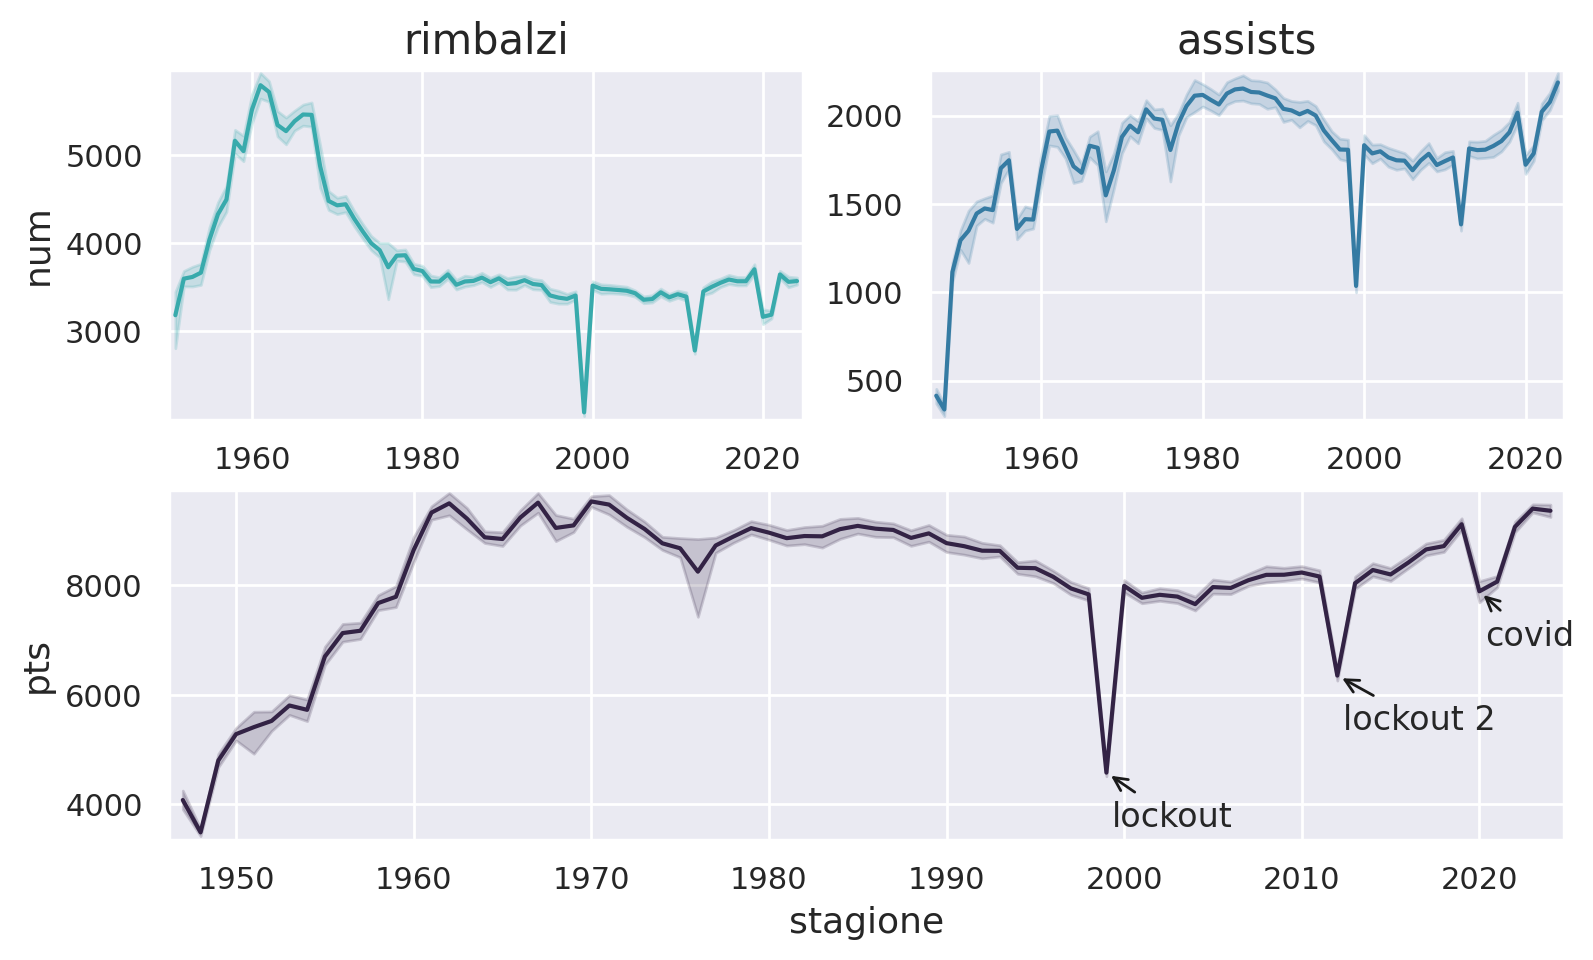

In [34]:
colors = sns.color_palette(palette='mako', n_colors=5)
plt.figure(figsize=(9,5))
ax1=plt.subplot(212)
ax1.margins(0.01)
sns.lineplot(total, x='season', y='pts',ax=ax1, color=colors[0])
annotations = [(1999, 4579, 'lockout'), (2020, 7892, 'covid'), (2012, 6353, 'lockout 2')]
for point in annotations:
    plt.annotate(f'{point[2]}',
                 xy=(point[0], point[1]), xycoords='data',
                 xytext=(point[0]+0.3, point[1]-1000), textcoords='data',
                 arrowprops=dict(color='k',arrowstyle='->'))
ax1.set_xlabel('stagione', fontsize=13)
ax1.set_ylabel('pts', fontsize=13)
ax2=plt.subplot(221)
ax2.margins(0.01)
sns.lineplot(total, x='season', y='trb', ax=ax2, color=colors[3])
ax2.set_xlabel('')
ax2.set_ylabel('num', fontsize=13)
ax2.set_title('rimbalzi',fontsize=15)
ax3=plt.subplot(222)
ax3.margins(0.01)
sns.lineplot(total, x='season',y='ast', ax=ax3, color=colors[2])
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_title('assists', fontsize=15)
plt.show()

notiamo come il numero di rimbalzi sia sceso notevolmente e ciò si collega al terzo punto dell'analisi 
da notare anche le tre punte ognuna con riferimento a 3 stagioni in cui il numeor di parite è stato inferiore

# Il tiro da 3 punti ha cambiato il gioco ?

## sguardo ai cambiamenti dopo l'introduzione del tiro da 3 punti

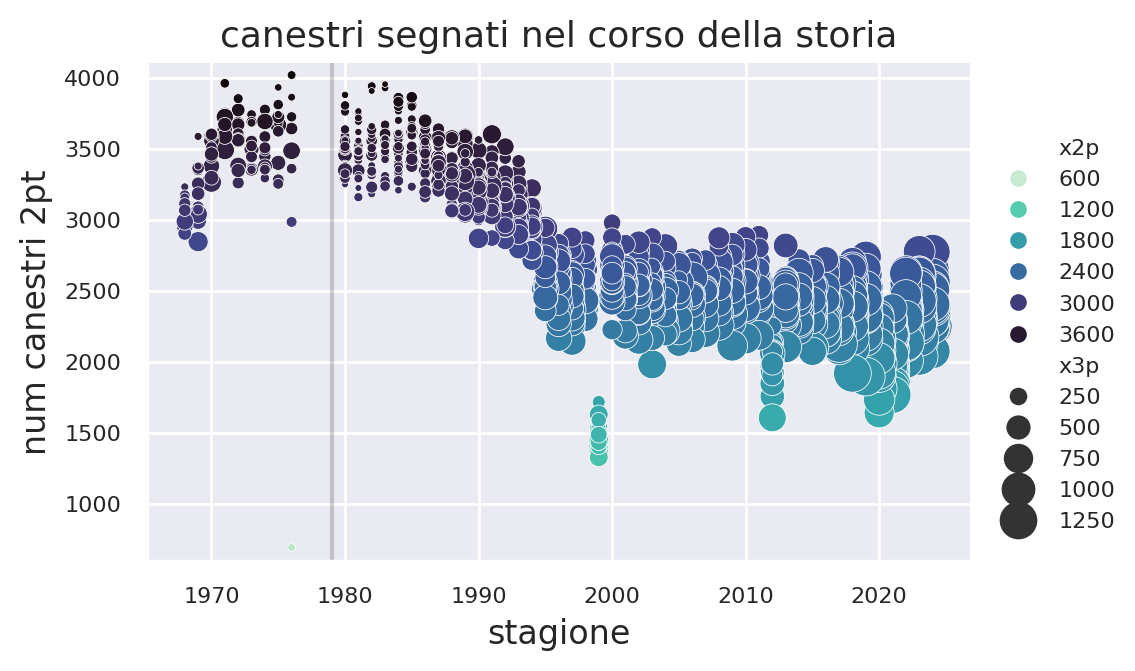

In [35]:
plt.rc('legend',fontsize=8)
plt.rc('legend',markerscale=1)
g=sns.relplot(
    data=total,
    x="season", y="x2p",hue='x2p',
    size="x3p",
    palette='mako_r', sizes=(5, 200)
)
g.figure.set_figheight(3)
g.figure.set_figwidth(6)
g.ax.set_ylim(600,4100)
g.ax.set_title('canestri segnati nel corso della storia', fontsize=13)
g.ax.set_ylabel('num canestri 2pt')
g.ax.tick_params(axis='both', which='major', labelsize=8)
g.ax.tick_params(axis='both', which='minor', labelsize=8)
g.ax.set_xlabel('stagione')
g.ax.axvline(x=1979, color='k', alpha=0.2)
plt.show()

notiamo come dopo l'introduzione del tiro da 3 il gioco sia cambiato fornendo variabilità rispetto al tiro classico


## Il tiro da 3 punti è più efficacie del tiro da 2 punti?

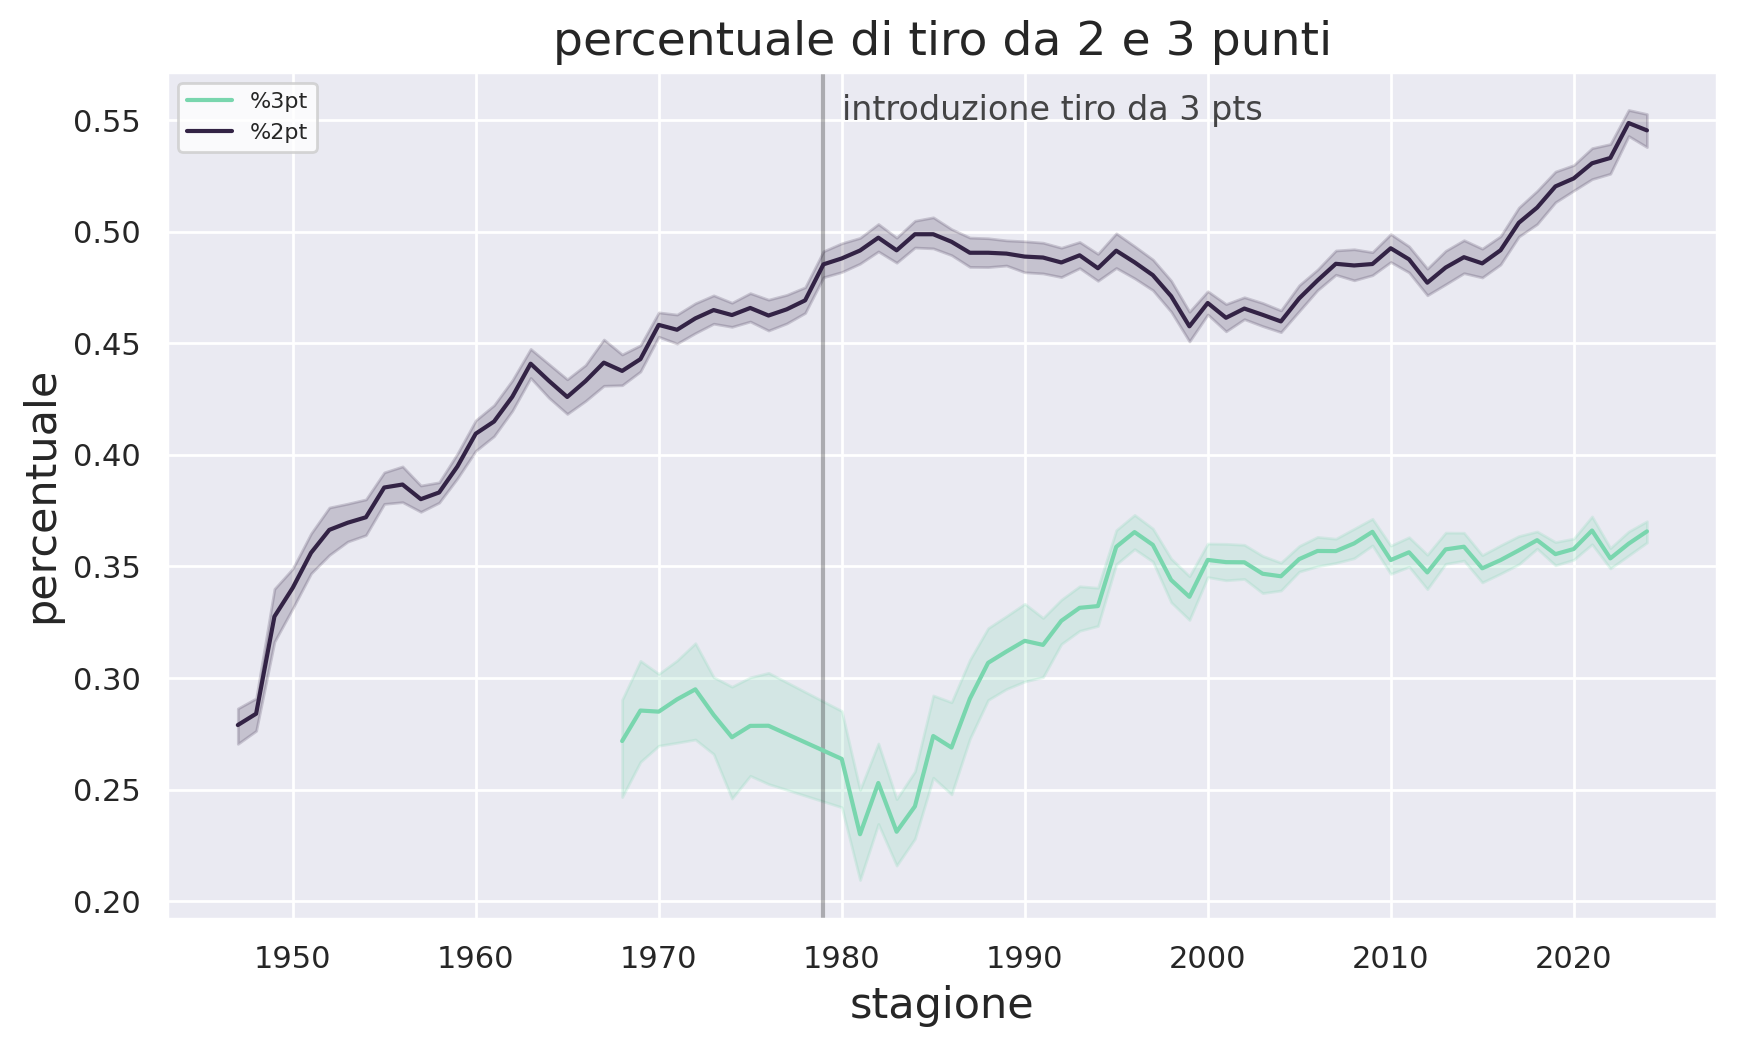

In [36]:
colors = sns.color_palette(palette='mako', n_colors=5)
f,ax=plt.subplots(figsize=(10,5.5), sharex=True, sharey=True)
ax.axvline(x=1979, color='k', alpha=0.3)
sns.lineplot(total,x='season', y='x3p_percent', color=colors[4], ax=ax, label='%3pt')
sns.lineplot(total, x='season', y='x2p_percent', color=colors[0], ax=ax, label='%2pt')
ax.annotate('introduzione tiro da 3 pts',
                 xy=(1979, 0.55), xycoords='data',
                 xytext=(1980, 0.55), textcoords='data', color='k',alpha=0.8, size=12)
ax.set_title('percentuale di tiro da 2 e 3 punti', fontsize=17)
ax.legend(frameon=True, framealpha=0.8, facecolor='w')
ax.set_ylabel('percentuale', fontsize=15.5)
ax.set_xlabel('stagione',fontsize=15.5)
plt.show()

un risultato inaspettato è che nonostante ci sia stato un notevole incremento del tiro da 3, le percentuali del tiro da 2 sono in continua crescita

# La fisicità è stata abbandonata per dare spazio allo spettacolo?

## il defensive rating 


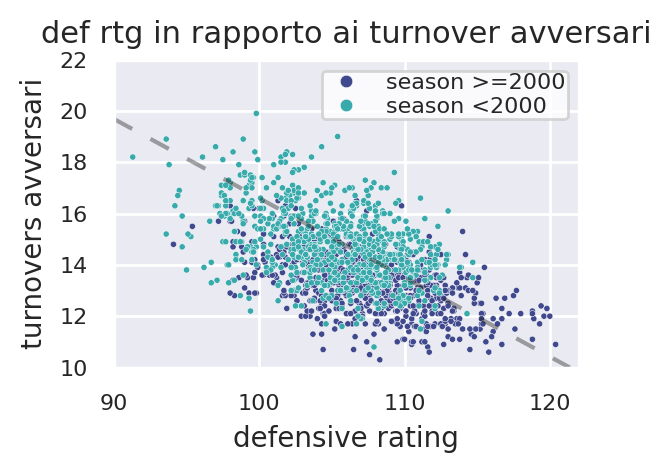

In [37]:
summary = pd.read_parquet(os.path.join('team_summary.parquet'))
total = pd.read_csv(os.path.join('nba', 'Team Totals.csv'))
defense = total.merge(summary).loc[:,['season', 'abbreviation','drb','orb','trb', 'stl', 'blk','tov', 'pf','o_rtg', 'd_rtg','n_rtg','opp_e_fg_percent','opp_tov_percent','opp_drb_percent']]

#cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
f, ax = plt.subplots(figsize=(3,2))
a = sns.scatterplot(defense, x='d_rtg', y='opp_tov_percent', hue=defense['season']<2000, s=5,palette='mako')
handles, labels = a.get_legend_handles_labels()
ax.legend(handles=handles, labels=['season >=2000', 'season <2000'], markerscale=2, framealpha=0.8, borderpad=0.1, labelspacing=0.2, fontsize=8,frameon=True, facecolor='w')
#sns.histplot(defense, x='d_rtg', y='opp_tov_percent', bins=50, pthresh=.1, cmap='mako')
#sns.kdeplot(defense, x='d_rtg', y='opp_tov_percent', levels=5, color="w", linewidths=1)
start = (np.min(defense['d_rtg'])+10, np.max(defense['opp_tov_percent']))
end = (np.max(defense['d_rtg']), np.min(defense['opp_tov_percent']))
plt.axline(start, end, color="k", linestyle=(0, (5, 5)), alpha=0.39)
ax.set_ylabel('turnovers avversari',fontsize=10)
ax.set_xlabel('defensive rating',fontsize=10)
ax.set_title('def rtg in rapporto ai turnover avversari', fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_xlim(90,122)
ax.set_ylim(10,22)
plt.savefig('plots/defrtg.png')


In [38]:
print('pearson:', sp.stats.pearsonr(defense.dropna()['d_rtg'],defense.dropna()['opp_tov_percent'])[0])
print('spearman:',sp.stats.spearmanr(defense.dropna()['d_rtg'],defense.dropna()['opp_tov_percent'])[0])
print('kendall:',sp.stats.kendalltau(defense.dropna()['d_rtg'],defense.dropna()['opp_tov_percent'])[0])

pearson: -0.5288414072318302
spearman: -0.4910100981525173
kendall: -0.34555510391757954


pearson: -0.5288414072318302


# Esiste una statistica che permetta di anticipare il risultato di una partita?


## il true shooting percent e l'effective field goal percent

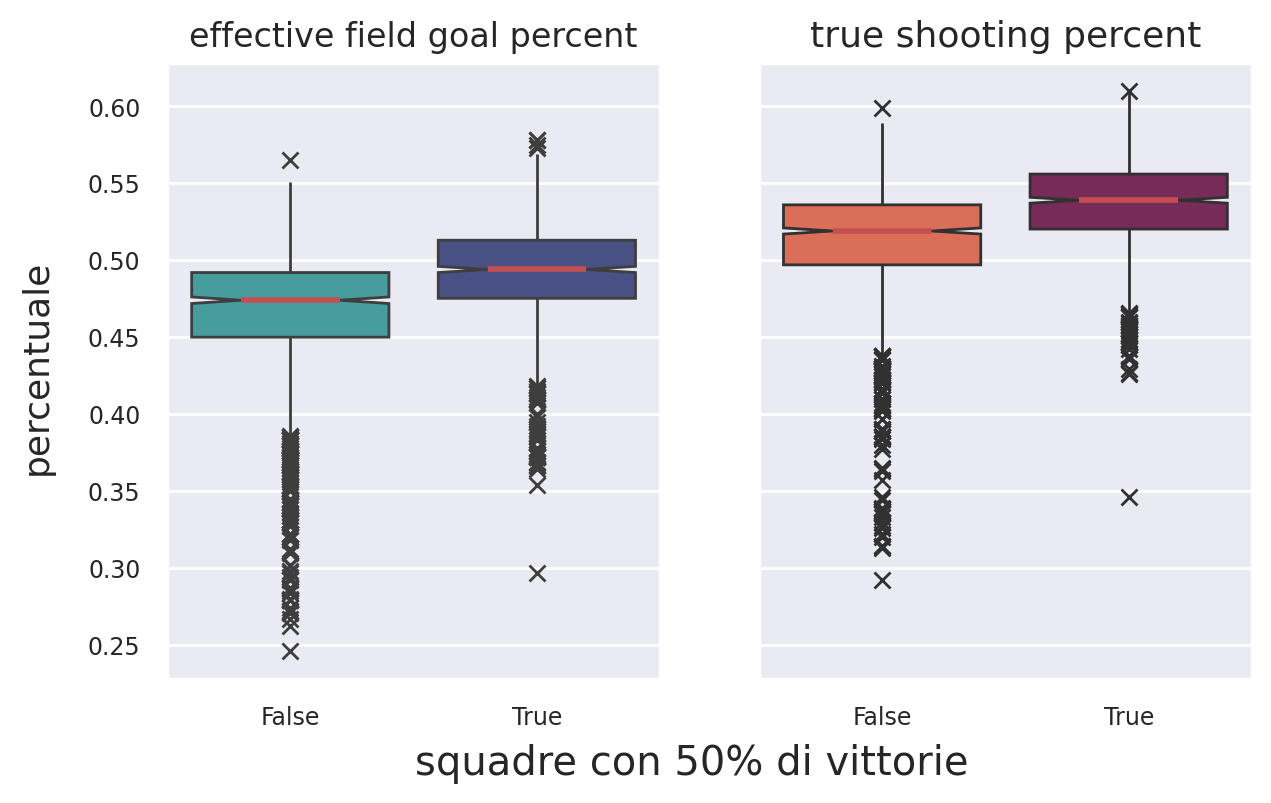

In [39]:
team_games = pd.read_csv(os.path.join('nba', 'Team Stats Per Game.csv'))
total = summary.merge(total.merge(team_games))
f,(ax1,ax2) = plt.subplots(1,2, figsize=(7,4), sharey=True)
g=sns.boxplot(
    data=total, x=total['w']>=41, y="e_fg_percent",hue=total['w']>=41,legend=False,
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
   #boxprops={"facecolor": (.7, .7, .7, .5)},
    medianprops={"color": "r", "linewidth": 2}, ax=ax1, palette="mako_r"
)
g.set(xlabel='', ylabel='')
ax1.set_title('effective field goal percent')
h=sns.boxplot(
    data=total, x=total['w']>=41, y="ts_percent",hue=total['w']>=41,legend=False,
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    #boxprops={"facecolor": (.5, .7, .3, .5)},
    medianprops={"color": "r", "linewidth": 2},ax=ax2, palette="rocket_r"
)
ax2.set_title('true shooting percent', fontsize=13)
h.set(xlabel='', ylabel='')
f.supylabel('percentuale', fontsize=13)
f.supxlabel('squadre con 50% di vittorie',y=-0.02)
ax1.tick_params(axis='both', which='major', labelsize=8.5)
ax1.tick_params(axis='both', which='minor', labelsize=8.5)
ax2.tick_params(axis='both', which='major', labelsize=8.5)
ax2.tick_params(axis='both', which='minor', labelsize=8.5)
plt.show()

In [44]:
print('pearson:', sp.stats.pearsonr(total.dropna()['w'],total.dropna()['ts_percent'])[0])
print('pearson:', sp.stats.pearsonr(total.dropna()['w'],total.dropna()['e_fg_percent'])[0])
print('spearman:',sp.stats.spearmanr(total.dropna()['w'],total.dropna()['ts_percent'])[0])
print('kendall:',sp.stats.kendalltau(total.dropna()['w'],total.dropna()['ts_percent'])[0])

pearson: 0.4699634523501159
pearson: 0.4134377169573216
spearman: 0.45367781316290157
kendall: 0.31642296540953113


# Conclusioni

1. il tiro da 3 punti ha dato un'alternativa offensiva, facendo diminuire la mole del tiro classico e rendendolo allo stesso tempo sempre più efficacie 
   

2. la fisicità è stata effettivamente abbandonata per dare spazio allo spettacolo

3. ci sono delle statistiche che possono guidarci verso le squadre che vinceranno con più probabilità ma la certezza della vittoria di una squadra rispetto ad un'altra è impossibile